In [1]:
import pandas as pd
df=pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

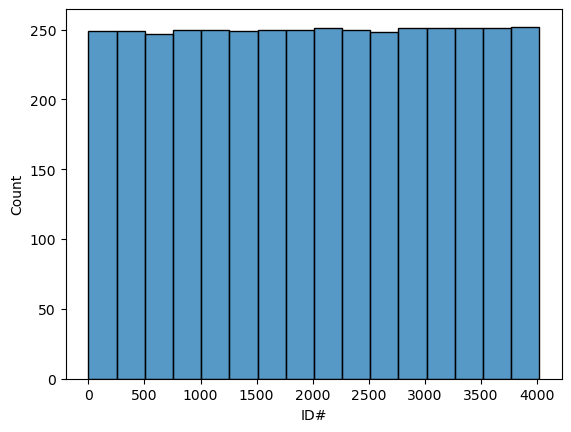

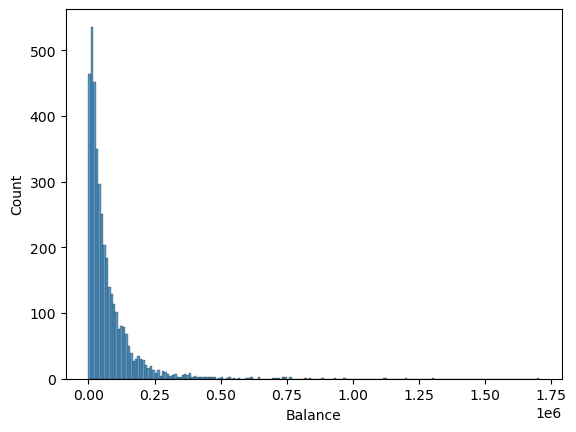

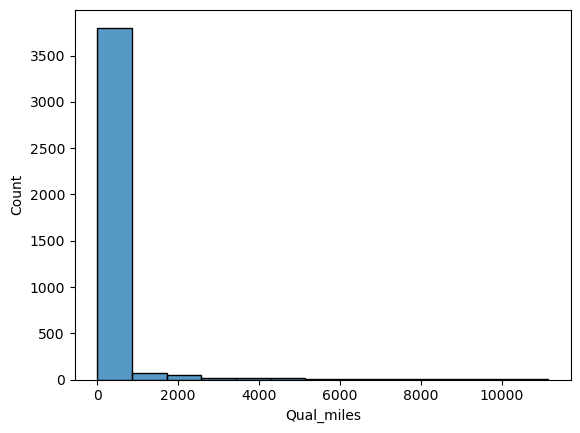

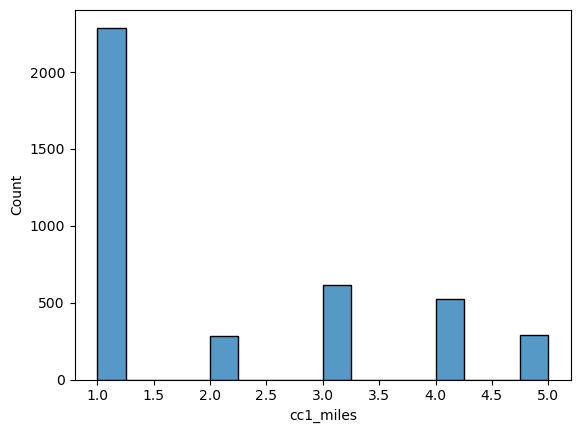

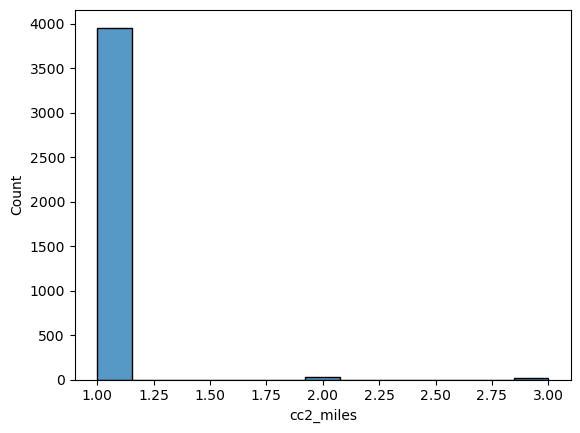

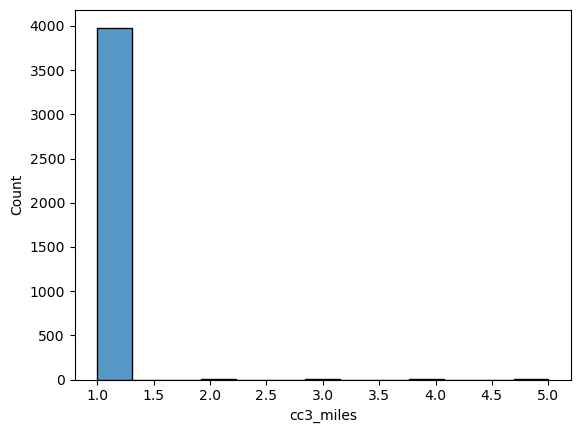

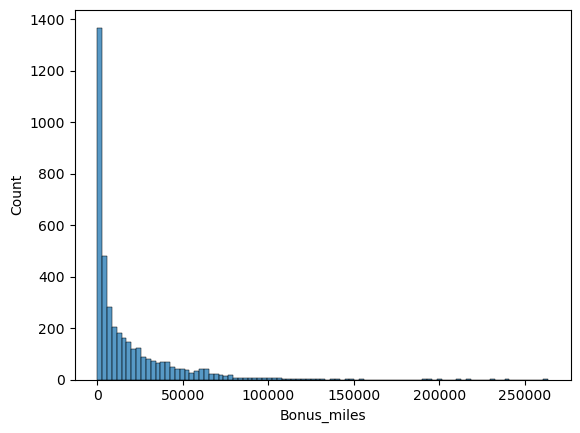

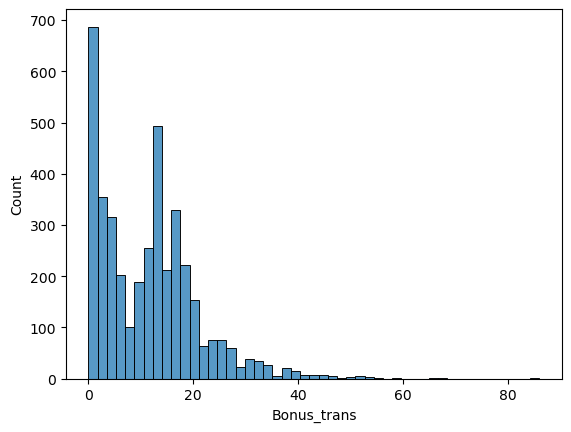

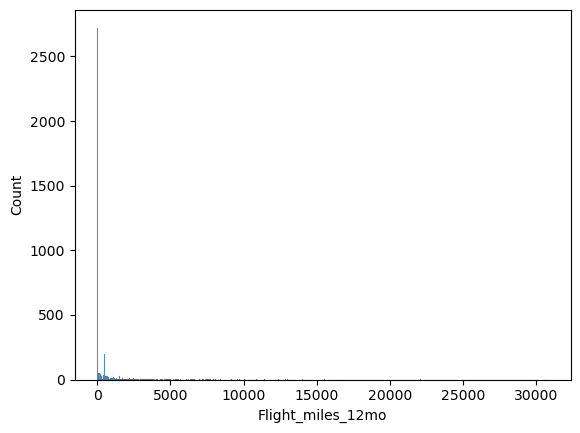

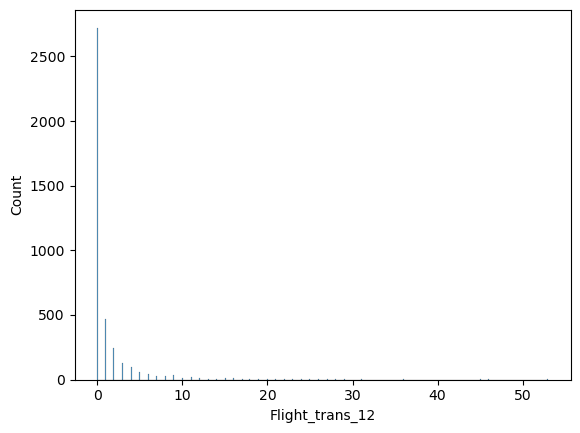

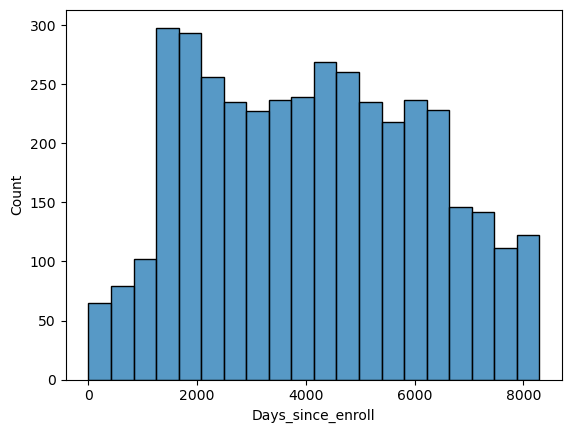

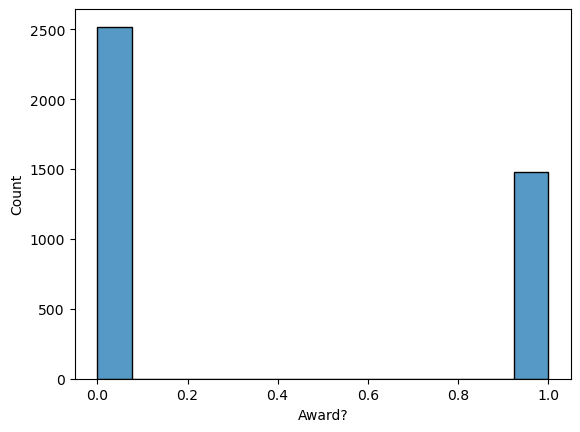

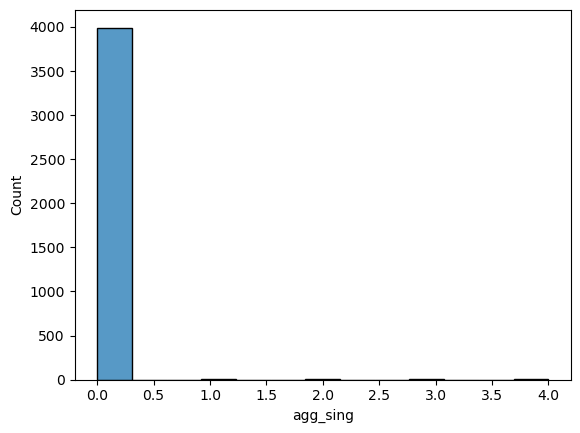

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

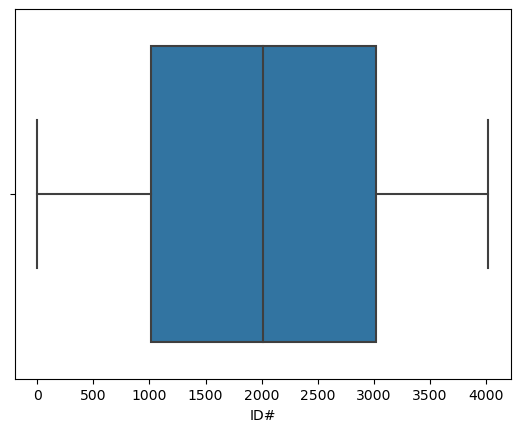

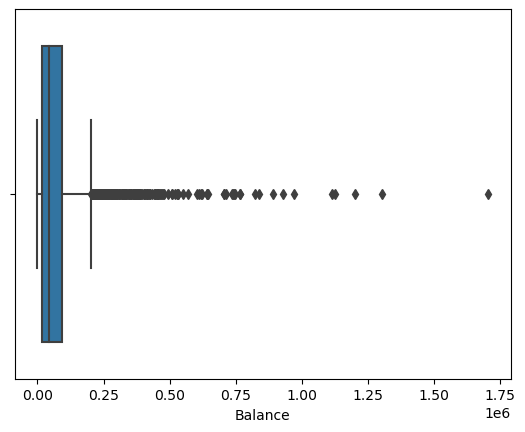

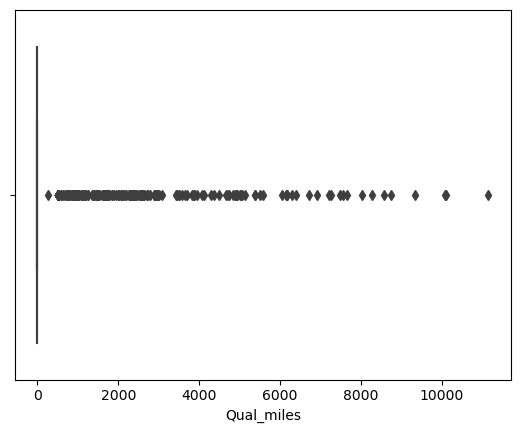

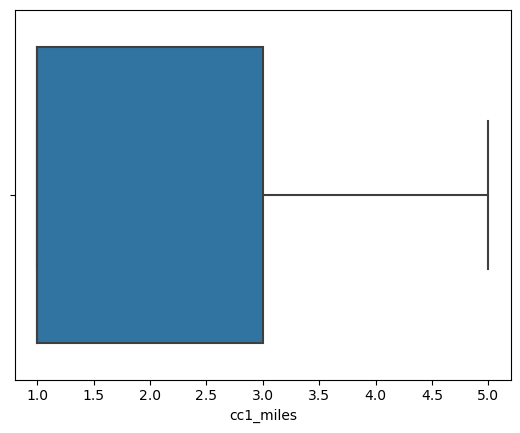

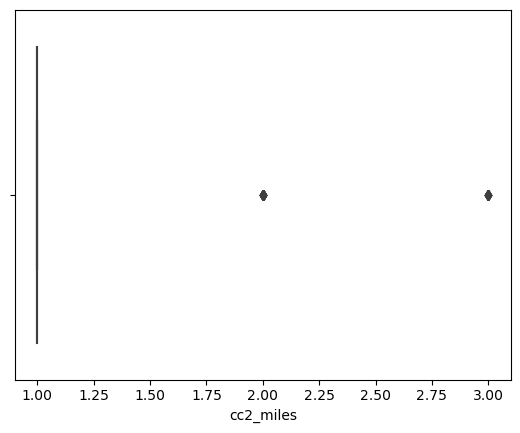

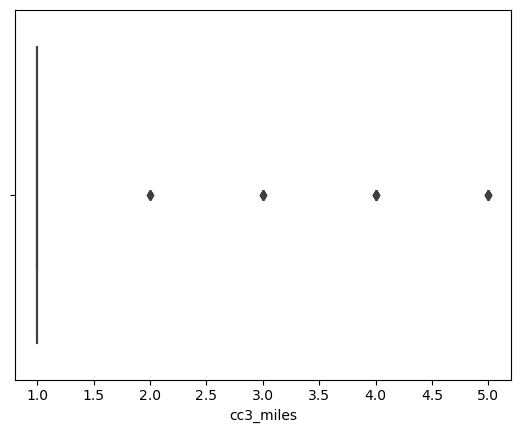

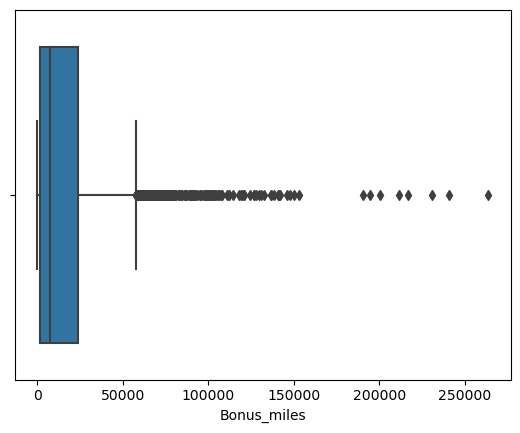

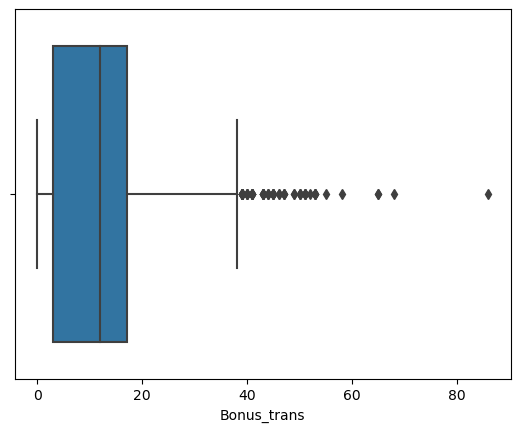

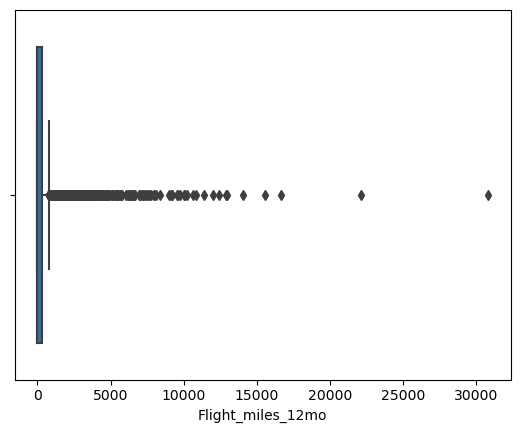

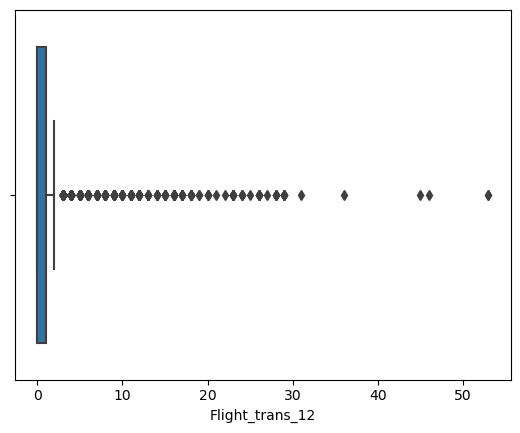

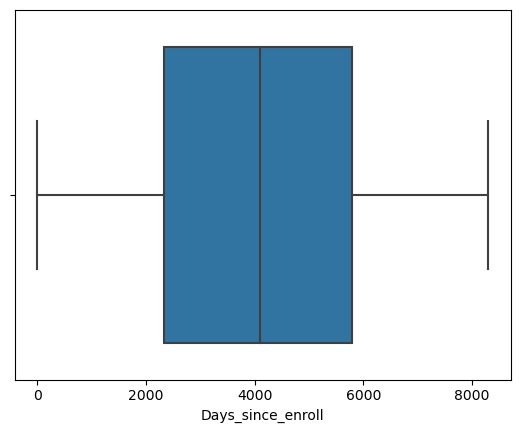

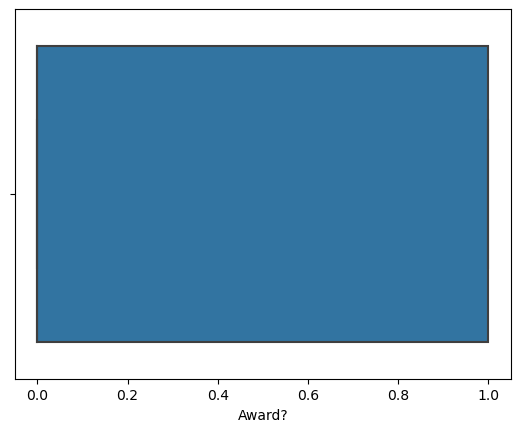

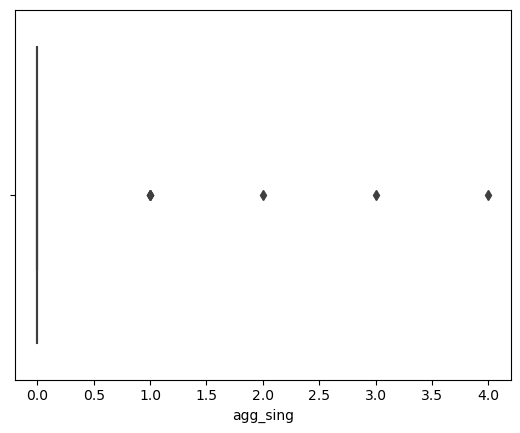

In [18]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()
    

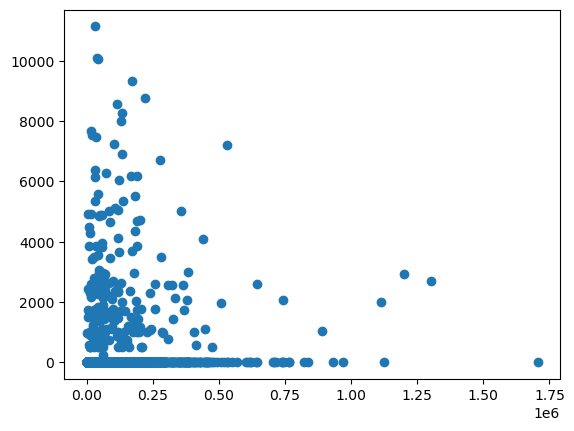

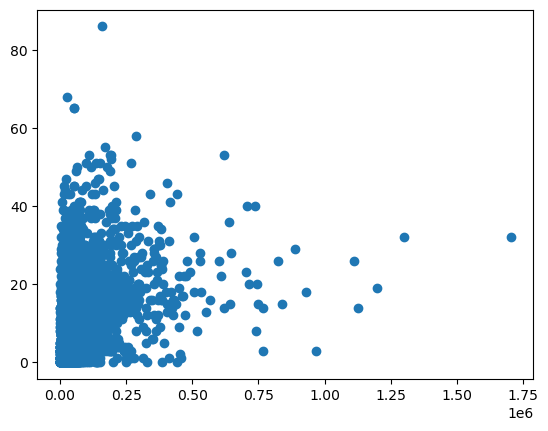

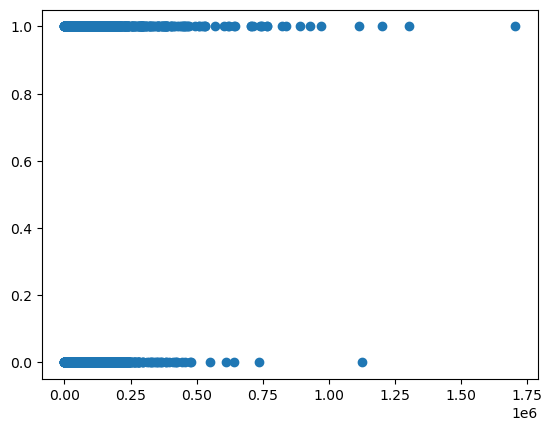

In [19]:
plt.scatter(df["Balance"],df["Qual_miles"])
plt.show()
plt.figure()
plt.scatter(df["Balance"],df["Bonus_trans"])
plt.show()
plt.figure()
plt.scatter(df["Balance"],df["Award?"])
plt.show()

In [20]:

# Check for outliers (example: using IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound))
#IQR_outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#IQR_outliers

# Option 1: Remove outliers
df_clean = df[~outliers.any(axis=1)]
print(f"Original dataset size: {df.shape}")
print(f"Size after removing outliers: {df_clean.shape}")
df_clean

Original dataset size: (3999, 13)
Size after removing outliers: (2875, 13)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
#One-Hot Encoding
df_clean=pd.get_dummies(df, drop_first=True) 
df_clean

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [23]:
df.shape

(3999, 13)

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  agg_sing           3999 non-null   int64
dtypes: int64(13)
memory usage: 406.3 KB


In [27]:
df['agg_sing']

0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: agg_sing, Length: 3999, dtype: int64

In [32]:
#Linkage method
X=df_clean.iloc[:,2:]
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,linkage="single")

df_clean["agg_sing"]=cluster.fit_predict(X)
print(df_clean.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   agg_sing  
0         4  
1         4  
2       

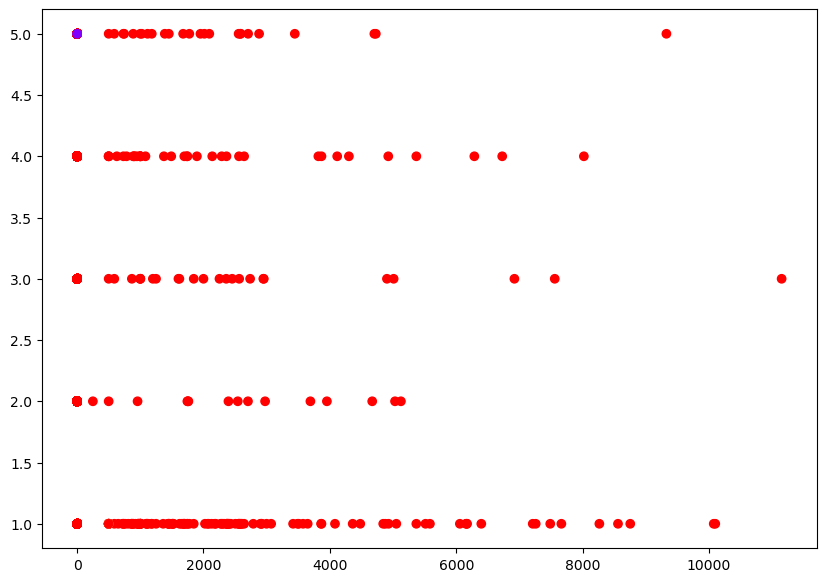

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=cluster.labels_,cmap="rainbow")

In [31]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df_clean["agg_sing"])
print("silhoutte Score:",score.round(2))
print(X)

silhoutte Score: 0.61
      Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  \
0              0          1          1          1          174            1   
1              0          1          1          1          215            2   
2              0          1          1          1         4123            4   
3              0          1          1          1          500            1   
4              0          4          1          1        43300           26   
...          ...        ...        ...        ...          ...          ...   
3994           0          1          1          1         8525            4   
3995           0          1          1          1          981            5   
3996           0          3          1          1        25447            8   
3997           0          1          1          1          500            1   
3998           0          1          1          1            0            0   

      Flight_miles_12mo  Flig

In [33]:
 #complete linkage method

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7,linkage='complete')
df_clean["agg_comp"] = cluster.fit_predict(X)
df_clean.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing,agg_comp
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,6
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,6
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,6
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,6
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,3


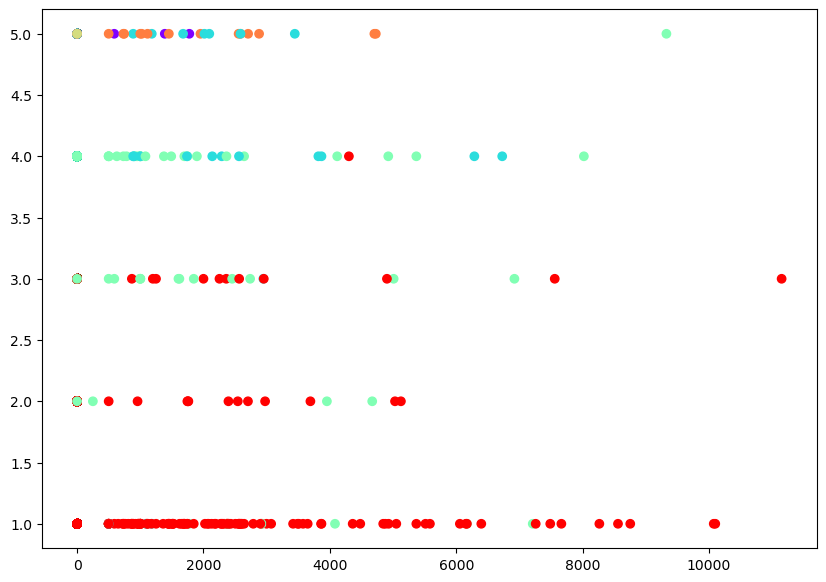

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

In [35]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,df_clean["agg_comp"])
print("Silhouttte score: ",score.round(2))
df_clean.head()

Silhouttte score:  0.63


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing,agg_comp
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,6
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,6
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,6
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,6
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,3


In [36]:
#DBSCAN
X = df_clean.iloc[:,0:]
X.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing,agg_comp
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,6
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,6
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,6
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,6
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,3


In [37]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.75,min_samples=3)
df_clean["Dbscan"] = cluster.fit_predict(X)
df_clean.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing,agg_comp,Dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,6,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,6,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,6,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,6,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,3,-1


In [38]:
df_clean["Dbscan"].value_counts()
df_outliers = df_clean[df_clean["Dbscan"] == -1]
df_final    = df_clean[df_clean["Dbscan"] != -1]
df_final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing,agg_comp,Dbscan


In [46]:
#KMeans Clustering
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5, n_init=20)
df["K_Cluster"] = cluster.fit_predict(X)

df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,agg_sing,K_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0


In [47]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,df["K_Cluster"])
print("Silhouttte score: ",score.round(2))


Silhouttte score:  0.54


In [48]:
scores= [] 
for i in range(2,11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i, n_init=20)
    df["K_Cluster"] = cluster.fit_predict(X)
    scores.append(silhouette_score(X,df["K_Cluster"]))
scores

[0.7417389970941872,
 0.6493060299525368,
 0.5901962571915002,
 0.5413969873594772,
 0.5147223244452849,
 0.4759140447318282,
 0.4735279487587229,
 0.4392862905991726,
 0.4240822067412302]

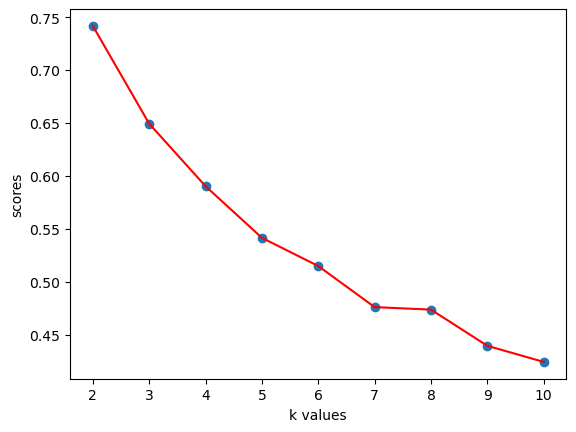

In [49]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11),scores)
plt.plot(range(2,11),scores,color='red')
plt.xlabel("k values")
plt.ylabel("scores")
plt.show()